# TP4 Ridge et Lasso, Validation croisée


### Table of Contents

* [0. Préparation des données](#chapter0)
* [1. Régression Ridge et Lasso](#chapter1)
* [2. Validation croisée pour le hyperparamètre $\alpha$ de Ridge et de Lasso](#chapter2)




## 0. Préparation des données <a class="anchor" id="chapter0"></a>

Pour les deux premières sections, on va prédire le salaire d’un joueur de baseball en fonction de certaines statistiques associées à ses performances sur l’année. On va utiliser l'ensemble de données `Hitters`.

Référence : La base de données `Hitters` vient du livre "James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013".

In [3]:
import numpy as np
import pandas as pd  #pandas pour la gestion des données 
import matplotlib.pyplot as plt


hitters = pd.read_csv("Hitters.csv", index_col = "Name")  

print(hitters.head())

                   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
Name                                                                            
-Andy Allanson       293    66      1    30   29     14      1     293     66   
-Alan Ashby          315    81      7    24   38     39     14    3449    835   
-Alvin Davis         479   130     18    66   72     76      3    1624    457   
-Andre Dawson        496   141     20    65   78     37     11    5628   1575   
-Andres Galarraga    321    87     10    39   42     30      2     396    101   

                   CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  \
Name                                                                      
-Andy Allanson          1     30    29      14      A        E      446   
-Alan Ashby            69    321   414     375      N        W      632   
-Alvin Davis           63    224   266     263      A        W      880   
-Andre Dawson         225    828   838     354      N    

**Exercice 1** : 

Dans `pd.read_csv("Hitters.csv", index_col = "Name") `, qu'est-ce que `index_col = "Name"` signifie ? Essayer le prochain code sans `index_col = "Name"`.



In [4]:
hitters_bis = pd.read_csv("Hitters.csv")  

print(hitters_bis)

                  Name  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
0       -Andy Allanson    293    66      1    30   29     14      1     293   
1          -Alan Ashby    315    81      7    24   38     39     14    3449   
2         -Alvin Davis    479   130     18    66   72     76      3    1624   
3        -Andre Dawson    496   141     20    65   78     37     11    5628   
4    -Andres Galarraga    321    87     10    39   42     30      2     396   
..                 ...    ...   ...    ...   ...  ...    ...    ...     ...   
317      -Willie McGee    497   127      7    65   48     37      5    2703   
318   -Willie Randolph    492   136      5    76   50     94     12    5511   
319    -Wayne Tolleson    475   126      3    61   43     52      6    1700   
320     -Willie Upshaw    573   144      9    85   60     78      8    3198   
321     -Willie Wilson    631   170      9    77   44     31     11    4908   

     CHits  ...  CRuns  CRBI  CWalks  League Divisi

Réponse pour l'exercice 1

index_col="Name" va servir à indexer le jeu de données en fonction des noms des joueurs



**Exercice 2** :

(1)  Quelle est la taille des `Hitters` ? 

(2)  Quelles sont les features de `Hitters` ? 

(3)  Est-ce que toutes les features sont dans $\mathbb{R}$? 

(4)  Y’a t-il beaucoup de données manquantes ? `print` le nombre des données manquantes pour chaque feature. 

- Indication : 
    - (2) et (3) Utiliser `pandas.DataFrame.dtypes`.   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
    - (4) Utiliser `pandas.DataFrame.isnull`.
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
    Un exemple est en bas.

In [5]:
# Indication pour la question (4) : Constater les résultats du programme suivant. 

print(hitters.shape)

ex = pd.DataFrame(dict(nom=['Alice', 'Nicolas', 'Jean'],
                       age=[19, np.NaN, np.NaN],
                       exam=[15,14,np.NaN]))

print ("Les données : \n", ex)
print ("Premier résultat : \n", ex.isnull())
print ("Deuxieme résultat : \n", ex.isnull().sum())

(322, 20)
Les données : 
        nom   age  exam
0    Alice  19.0  15.0
1  Nicolas   NaN  14.0
2     Jean   NaN   NaN
Premier résultat : 
      nom    age   exam
0  False  False  False
1  False   True  False
2  False   True   True
Deuxieme résultat : 
 nom     0
age     2
exam    1
dtype: int64


In [6]:
# Réponse pour l'exercice 2

print("1) La taille de Hitters est : ", hitters.shape)

print("2) Les features de Hitters sont : ", hitters.columns)

print("3) Voici les types de chaque feature : ")

hitters.info()

print("--> Les features League, Division et NewLeague ne sont pas dans R.")

print("4) Voici les features avec le nombre de données manquantes : ", hitters.isnull().sum()[hitters.isnull().sum()!=0])

1) La taille de Hitters est :  (322, 20)
2) Les features de Hitters sont :  Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')
3) Voici les types de chaque feature : 
<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11 

Comme on va prédire le salaire d’un joueur de baseball, s'il manque la valeur de son salaire, on ne peut que supprimer les données de ce joueur avant de faire le modèle de prédiction. 

Dans ce TP, pour simplifier, **on ne prend que les features qui sont déjà dans $\mathbb{R}$** et on ignore les features catégoriques comme `League`, `Division` et `NewLeague`.

Remarque, pour les features catégoriques, on peut utiliser le one-hot encoding, voir `pandas.get_dummies` https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies.

**Exercice 3** :

(1) D'abord, on supprime les données ayant `Salary` manquant. 
Indication : utiliser `pandas.DataFrame.dropna`. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

(2) On choisit les features dans $\mathbb{R}$ comme X (dans ce TP, ce sont des colonnes ayant type `int64`) et on note la colonne `Salary` comme Y.
Indication : utiliser `pandas.DataFrame.loc`.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [7]:
# Réponse pour l'exercice 3
hitters = hitters.dropna()

# Remplir votre code ici
X = hitters.select_dtypes(include=["int64"])
Y = hitters["Salary"]




# check-point 
print (Y.isnull().sum())  # qui devrait être 0
print (X.shape) # qui devrait être (322-59, 20-4)=(263,16)


0
(263, 16)


## 1. Régression Ridge et Lasso <a class="anchor" id="chapter1"></a>

**Exercice 4** : (1) Créer un modèle de régression Ridge avec `alpha=1`, nommé `ridge`. Que signifie le paramètre `alpha`?

Indication : Utiliser `sklearn.linear_model.Ridge`.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

(2) Entraîner `ridge` sur les données `(X,Y)`.

(3) Quels sont les coefficents ( y compris `intercept`) obtenus ?

In [8]:
# Réponse pour l'exercice 4
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X, Y)

print("Les coefficients obtenus sont : ", ridge.coef_)

print("L'intercept vaut : ", ridge.intercept_)





Les coefficients obtenus sont :  [-2.20287932  7.82697068  2.16196029 -2.09868663 -0.02245984  6.15062897
 -2.5880828  -0.1763119   0.06991913 -0.23282742  1.60993326  0.80133141
 -0.79388497  0.29457527  0.38398464 -2.87825534]
L'intercept vaut :  126.08586774788643


**Exercice 5** : (1) Créer un modèle de régression Lasso avec `alpha=1`, nommé `lasso`. Que signifie le paramètre `alpha`?

Indication : Utiliser `sklearn.linear_model.Lasso` https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

(2) Entraîner `lasso` sur les données `(X,Y)`.

Remarque : On ignore le `warning` pour cette question. (Dans ce cas, on pourra écrire nous-même e.g. la descente de gradient stochastique pour vérifier la convergence. On ignore ici car ce n'est pas l'objectif de ce TP.)

(3) Quels sont les coefficents ( y compris `intercept`) obtenus ?

In [82]:
# Réponse pour l'exercice 5
from sklearn import linear_model

import warnings
warnings.filterwarnings("ignore")

#Le paramètre alpha est l'hyperparamètre du modèle
lasso = linear_model.Lasso(alpha=1)

lasso.fit(X,Y)

print("Les coefficients obtenus sont : ", lasso.coef_)

print("L'intercept vaut : ", lasso.intercept_)



Les coefficients obtenus sont :  [-2.16482646  7.63712464  1.89407188 -1.91767075  0.03830205  6.06939193
 -1.60304168 -0.19483094  0.16016231 -0.09294004  1.55251191  0.74921021
 -0.77052554  0.29422566  0.38804059 -2.87582655]
L'intercept vaut :  123.24921194604997



-------------------

Maintenant on va montrer le changement des coefficients en fonction de `alpha` (*shrinkage* en anglais). 

On va générer les valeurs d'`alpha` comme suit,

[1.00000000e-02 1.59985872e-02 2.55954792e-02 4.09491506e-02
 6.55128557e-02 1.04811313e-01 1.67683294e-01 2.68269580e-01
 4.29193426e-01 6.86648845e-01 1.09854114e+00 1.75751062e+00
 2.81176870e+00 4.49843267e+00 7.19685673e+00 1.15139540e+01
 1.84206997e+01 2.94705170e+01 4.71486636e+01 7.54312006e+01
 1.20679264e+02 1.93069773e+02 3.08884360e+02 4.94171336e+02
 7.90604321e+02 1.26485522e+03 2.02358965e+03 3.23745754e+03
 5.17947468e+03 8.28642773e+03 1.32571137e+04 2.12095089e+04
 3.39322177e+04 5.42867544e+04 8.68511374e+04 1.38949549e+05
 2.22299648e+05 3.55648031e+05 5.68986603e+05 9.10298178e+05
 1.45634848e+06 2.32995181e+06 3.72759372e+06 5.96362332e+06
 9.54095476e+06 1.52641797e+07 2.44205309e+07 3.90693994e+07
 6.25055193e+07 1.00000000e+08]


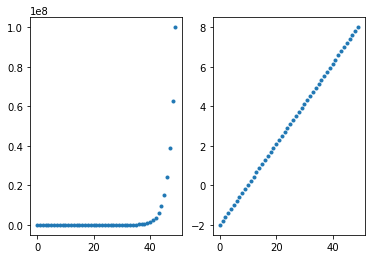

In [10]:
alpha_s = np.logspace(-2,8,50)

print (alpha_s)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(alpha_s, ".")
ax2.plot(np.log10(alpha_s), ".")


**Exercice 6** : (1) Pour chaque `alpha` dans `alpha_s`, on entraîne un modèle de régression de Ridge en utiliser `ridge.set_params`. Voir également cette page https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html. On enregistre les coefficients dans une liste. 

(2) Tracer (`plot`) le changement des coefficients en fonction de `log10(alpha)`. Que constatez-vous ?

(3) (Optionnel) Créer un modèle de régression linéaire, comparer les coefficients obtenus par  un modèle de régression linéaire et les coefficients obtenus par un modèle de régression de Ridge quand `alpha` est petit. 


On remarque que les coefficients ont tendance à converger vers 0


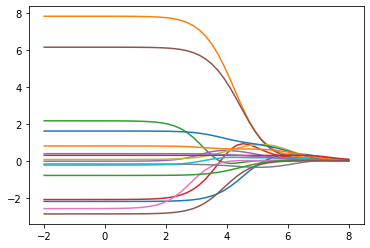

In [37]:
# Réponse pour l'exercice 6

ridge_parametres = []

for a in alpha_s:
    ridge.set_params(alpha=a)
    ridge.fit(X,Y)
    ridge_parametres.append(ridge.coef_)

plt.plot(np.log10(alpha_s), ridge_parametres)


print("On remarque que les coefficients ont tendance à converger vers 0")




**Exercice 7** : Les mêmes questions que l'**Exercice 6** mais pour la régression Lasso. 

Indication : pour tracer le changement des coefficients en fonction de alpha, on pourra utiliser `sklearn.linear_model.lasso_path`. 
Voir https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html

Attention : La sortie de `lasso_path` est un `tuple` (Voir par exemple https://courspython.com/tuple.html). 
Bien lire l'exemple dans la page de sklearn.

Remarque : On ignore le `warning` de cet exercice comme pour l'**Exercice 5**.

/Users/mathias/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25704.581830233335, tolerance: 12885.7065737425
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mathias/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22724.961838424206, tolerance: 12885.7065737425
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mathias/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133000.52530830353, tolerance: 12885.7065737425
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mathias/opt/anaconda3/lib/python3.9/site-pack

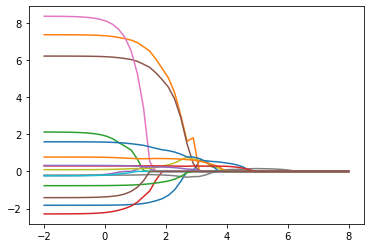

In [71]:
# Réponse pour l'exercice 7


from sklearn.linear_model import lasso_path

# remplir ici
lasso_parametres = []

alpha_path, coef_path, _ = lasso_path(X, Y, alphas=alpha_s)
plt.plot(np.log10(alpha_path) ,np.transpose(coef_path))


-------------------

Maintenant on va montrer que la régression Lasso va nous aider à sélectionner les variables i.e. certains coefficients deviennent 0 quand on augmente `alpha`. 


**Exercice 8** : Calculer le nombre de 0 dans les coefficients de la **régression Lasso** pour chaque `alpha`, nommé  `nb_zero_coefs_lasso `. (Lire la cellule suivante pour une indication)

Tracer une courbe de `nb_zero_coefs_lasso` en fonction de `log10(alphas)`.


In [13]:
# Indication pour l'exercice 8

ind=np.array([[0,1,1],[0,1,1],[0,1,0]])

print ("1.\n", ind)
print ("2.\n", ind==0)
print ("3. Le nombre de 0 de chaque colonne est :\n ", (ind == 0).sum(axis = 0))
print ("4. Le nombre de 0 de chaque ligne est : \n", (ind == 0).sum(axis = 1))


1.
 [[0 1 1]
 [0 1 1]
 [0 1 0]]
2.
 [[ True False False]
 [ True False False]
 [ True False  True]]
3. Le nombre de 0 de chaque colonne est :
  [3 0 1]
4. Le nombre de 0 de chaque ligne est : 
 [1 1 2]


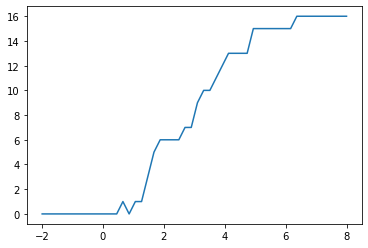

In [18]:
# Réponse pour l'exercice 8

nb_zero_coefs_lasso = ((coef_path==0).sum(axis = 0))
plt.plot(np.log10(alpha_path), nb_zero_coefs_lasso)






**Exercice 9** : (Optionnel) Calculer le nombre de 0 dans les coefficients de **régression Ridge** pour chaque `alpha`, nommé  `nb_zero_coefs_ridge `. (Lire la cellule suivante pour une indication)

Tracer une courbe de `nb_zero_coefs_ridge` en fonction de `log10(alphas)`.

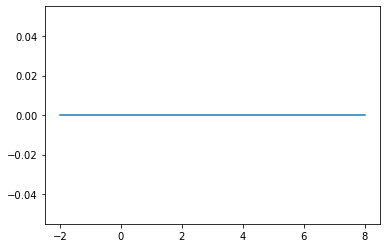

In [38]:
# Réponse pour l'exercice 9

nb_zero_coefs_ridge = []
for i in range(len(ridge_parametres)):
    nb_zero_coefs_ridge.append(((ridge_parametres[i]==0).sum(axis = 0)))

plt.plot(np.log10(alpha_s), nb_zero_coefs_ridge)



----------------


## 2. Validation croisée pour l'hyperparamètre $\alpha$ de Ridge et de Lasso <a class="anchor" id="chapter2"></a>

Maintenant on va sélectionner le meilleur `alpha` parmi les valeurs dans `alpha_s` par la validation croisée (ici on ne considère que *Leave-One-Out Cross-Validation*).

On va utliser `sklearn.linear_model.RidgeCV` et `sklearn.linear_model.LassoCV`.

Référence:

1. `sklearn.linear_model.RidgeCV` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

2. `sklearn.linear_model.LassoCV` : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html


In [40]:
from sklearn.linear_model import RidgeCV, LassoCV

# Les alphas qu'on va étudier sont comme dans les exercices précédents 

alpha_s = np.logspace(-2,8,50)

**Exercice 10** : (1) Créer un modèle `RidgeCV`, nommé `ridgeCV`, avec paramètres `alphas=alpha_s`  et `store_cv_values=True`. Entraîner ce modèle `ridgeCV` sur les données `(X,Y)`. 

(2) On a 50 `alpha`s. Pour chaque `alpha`, combien de scores de la validation croisée obtient-t-on ? Lire l'attribut `cv_values_` de `ridgeCV` et `print` `ridgeCV.cv_values_.shape`.

In [44]:
# Réponse pour l'exercice 10

ridgeCV = RidgeCV(alphas=alpha_s, store_cv_values=True)
ridgeCV.fit(X,Y)

print(ridgeCV.cv_values_.shape)

print("On obtient ainsi", ridgeCV.cv_values_.shape[0], "scores pour chaque alpha.")


(263, 50)
On obtient ainsi 263 scores pour chaque alpha.


**Exercice 11** : Pour chaque alpha, calcuer la moyenne de ses scores, nommée `alpha_score`.

In [45]:
# Indication de l'exercice 11 : 

ind2=np.array([[1,2,3],[4,5,6]])

print ("1\n",ind2.shape)
print ("2\n",ind2.mean(axis = 0))
print ("3\n",ind2.mean(axis = 1))


1
 (2, 3)
2
 [2.5 3.5 4.5]
3
 [2. 5.]


In [48]:
# Réponse pour l'exercice 11
alpha_score = ridgeCV.cv_values_.mean(axis = 0)
print(alpha_score.shape) #Il y a bien 50 moyennes car 50 alpha



(50,)


**Exercice 12** : Tracer la courbe de `alpha_score` en fonction de `log10(alpha_s)`. Quel `alpha` va-t-on choisir ? `print` les coefficients pour le meilleur `alpha`.

Indication : Lire les attributs `alpha_` et `coef_` de ridgecv.

D'après le graphe, on veut le score (erreur) le plus petit donc on prendra alpha = 13257.113655901108
Les coefficients de ridgeCV associé à ce alpha valent : [-1.37990565  4.3651537  -0.14430998  0.6097      0.54930715  3.91462758
 -0.01896382 -0.27716255  0.58108313  0.1843031   1.14349652  0.64368062
 -0.49383695  0.29345344  0.3184923  -1.1251208 ]


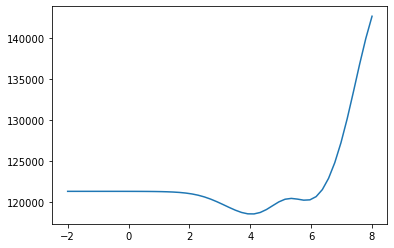

In [65]:
# Réponse pour l'exercice 12

plt.plot(np.log10(alpha_s), alpha_score)

print("D'après le graphe, on veut le score (erreur) le plus petit donc on prendra alpha =", ridgeCV.alpha_)

print("Les coefficients de ridgeCV associé à ce alpha valent :", ridgeCV.coef_)

**Exercice 13** : (Optionnel) Même questions que les **Exercices 10-12** pour `LassoCV`. 

**Attention**  : (1) Par défaut, `LassoCV` utilise la 5-fold cross-validation, qui diffère de la *Leave-One-Out Cross-Validation* de `RidgeCV`. Si on veut toujours faire *Leave-One-Out Cross-Validation* il faut changer les paramètres à `cv = len(Y)`.

**Attention**  : Les attributs de `LassoCV` sont également changés par rapport à `RidgeCV`.

Remarque : On ignore le `warning` de cet exercice comme pour l'**Exercice 5**.

(50, 263)
D'après le graphe, on veut le score (erreur) le plus petit donc on prendra alpha = 120.67926406393289
Les coefficients de ridgeCV associé à ce alpha valent : [-1.63808827  5.63569406  0.          0.          0.          4.58615405
 -0.         -0.23274963  0.36380683  0.          1.26001116  0.74094169
 -0.56974569  0.28950025  0.25841542 -0.        ]


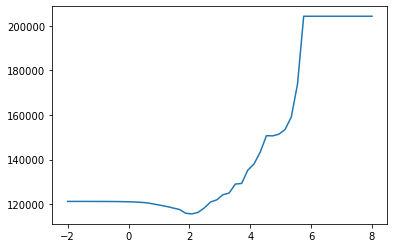

In [81]:
# Réponse pour l'exercice 13

import warnings
warnings.filterwarnings("ignore")

lassoCV = LassoCV(alphas=alpha_s, cv=len(Y))
lassoCV.fit(X,Y)

print(lassoCV.mse_path_.shape)

alpha_score_lasso = lassoCV.mse_path_.mean(axis = 1)

plt.plot(np.log10(alpha_path), alpha_score_lasso)

print("D'après le graphe, on veut le score (erreur) le plus petit donc on prendra alpha =", lassoCV.alpha_)

print("Les coefficients de ridgeCV associé à ce alpha valent :", lassoCV.coef_)

